In [ ]:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database
#피마 인디언 당뇨병 예측 - 머신러닝 예측 모델을 수립하고, 평가 지표를 적용

In [ ]:
#KFold, LightGBM Classifier 사용

In [28]:
#데이터를 로딩한 후 분포와 데이터를 확인
import pandas as pd
pima = pd.read_csv('../data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#당뇨병에 걸린 사람과 아닌 사람의 수 확인
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

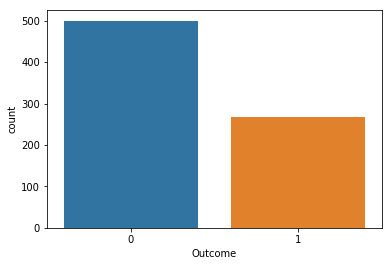

In [30]:
import seaborn as sns
sns.countplot(pima['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B45D0B39B0>,
      dtype=object)

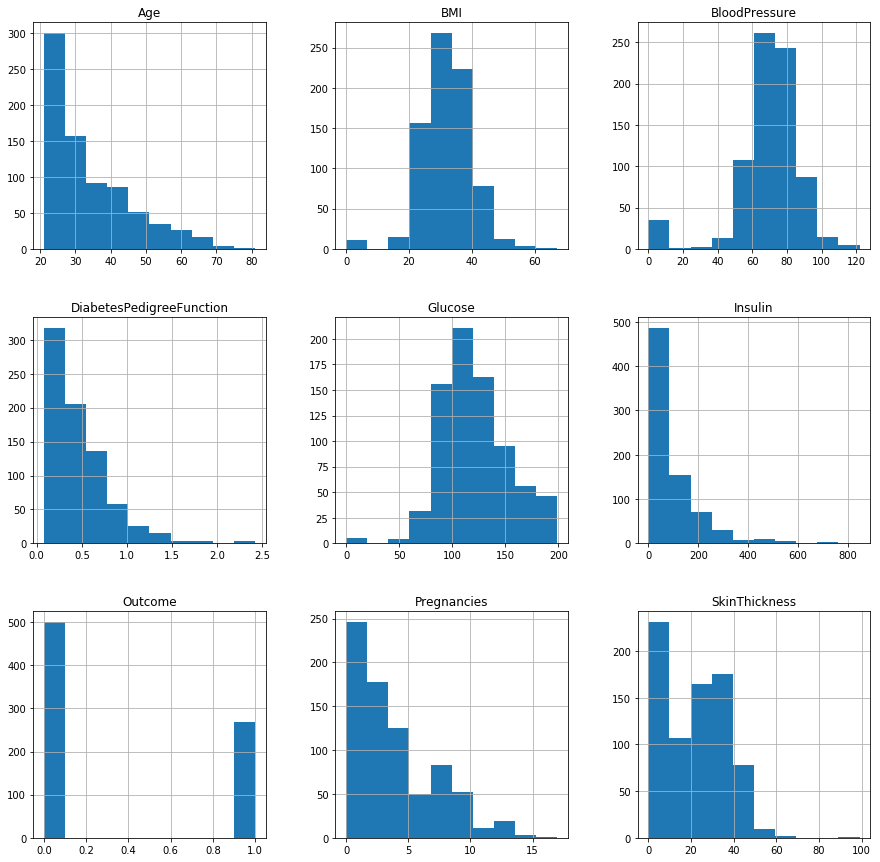

In [31]:
#데이터분포 확인
pima.hist(figsize=(15,15))

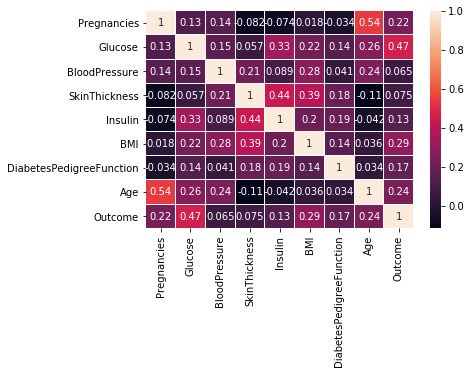

In [32]:
#특성들 간의 상관관계 확인
sns.heatmap(pima.corr(), linewidth = 0.01, annot = True)

In [33]:
#feature의 타입과 Null 개수 확인
print(pima.isnull().sum())
print(pima.info())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [34]:
#0인 값을 결측치로 바꾸기
pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [35]:
pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [41]:
#인슐린 결측치 처리: 타겟값 별 중간값 구하기
pima['Insulin'].loc[(pima['Outcome'] == 0 )].median()

102.5

In [42]:
pima['Insulin'].loc[(pima['Outcome'] == 1 )].median()

169.5

In [56]:
pima.loc[(pima['Outcome'] == 0 ) & (pima['Insulin'].isnull()), 'Insulin'] = 102.5
pima.loc[(pima['Outcome'] == 1 ) & (pima['Insulin'].isnull()), 'Insulin'] = 169.5

In [47]:
#클루코산 결측치 처리 : 타겟값 별 중간값 구하기
pima['Glucose'].loc[(pima['Outcome'] == 0 )].median()

107.0

In [48]:
pima['Glucose'].loc[(pima['Outcome'] == 1 )].median()

140.0

In [57]:
pima.loc[(pima['Outcome'] == 0 ) & (pima['Glucose'].isnull()), 'Glucose'] = 107.0
pima.loc[(pima['Outcome'] == 1 ) & (pima['Glucose'].isnull()), 'Glucose'] = 140.0

In [50]:
#혈압 결측치 처리: 타겟값 별 중간값 구하기
pima['BloodPressure'].loc[(pima['Outcome'] == 0 )].median()

70.0

In [51]:
pima['BloodPressure'].loc[(pima['Outcome'] == 1 )].median()

74.5

In [58]:
pima.loc[(pima['Outcome'] == 0 ) & (pima['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
pima.loc[(pima['Outcome'] == 1 ) & (pima['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [60]:
#피부 두께 결측치 처리: 타겟값 별 중간값 구하기
pima['SkinThickness'].loc[(pima['Outcome'] == 0 )].median()

27.0

In [61]:
pima['SkinThickness'].loc[(pima['Outcome'] == 1 )].median()

32.0

In [62]:
pima.loc[(pima['Outcome'] == 0 ) & (pima['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
pima.loc[(pima['Outcome'] == 1 ) & (pima['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [64]:
#BMI 결측치 처리: 타겟값 별 중간값 구하기
pima['BMI'].loc[(pima['Outcome'] == 0 )].median()

30.1

In [65]:
pima['BMI'].loc[(pima['Outcome'] == 1 )].median()

34.3

In [66]:
pima.loc[(pima['Outcome'] == 0 ) & (pima['BMI'].isnull()), 'BMI'] = 30.1
pima.loc[(pima['Outcome'] == 1 ) & (pima['BMI'].isnull()), 'BMI'] = 34.3

In [67]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [68]:
#타겟값 설정
pima.target = pima['Outcome']

C:\Users\NY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [69]:
pima.data = pima.drop('Outcome', axis = 1)

C:\Users\NY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [70]:
pima.data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10,115.0,70.0,27.0,70.0,35.3,0.134,29
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pima.data, pima.target, random_state = 0)

In [86]:
#로지스틱 회귀모델 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print(lr_clf.score(X_train, y_train))
print(lr_clf.score(X_test, y_test))

0.7604166666666666
0.78125


C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
import numpy as np
from sklearn.model_selection import KFold, cross_validate, cross_val_score
kfold = KFold(n_splits = 5)

scores = cross_val_score(lr_clf, pima.data, pima.target, cv = kfold)
scores.mean()
#5개 훈련점수의 평균 : 0.76

C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.7618113912231559

In [84]:
#점수 향상을 위해 StandardScaler 적용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\NY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [85]:
#다시 로지스틱 회귀 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print(lr_clf.score(X_train_scaled, y_train))
print(lr_clf.score(X_test_scaled, y_test))
#==>테스트 점수만 향상됨

0.7725694444444444
0.7864583333333334


C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
X_train_scaled.shape

(576, 8)

In [77]:
#k겹 교차 검증
import numpy as np
from sklearn.model_selection import KFold, cross_validate, cross_val_score
kfold = KFold(n_splits = 5)

scores = cross_val_score(lr_clf, np.concatenate([X_train_scaled,X_test_scaled]), pima.target, cv = kfold)
scores.mean()  
#5개 훈련점수의 평균 : 0.763

C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.6511671335200747

In [80]:
#LightGBM 모델 적용
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=17, silent=True, metric='None', n_jobs=4)
lgbm_clf.fit(X_train, y_train)

print(lgbm_clf.score(X_train, y_train))
print(lgbm_clf.score(X_test, y_test))

1.0
0.90625


In [82]:
#k겹 교차 검증
import numpy as np
from sklearn.model_selection import KFold, cross_validate, cross_val_score
kfold = KFold(n_splits = 5)

scores = cross_val_score(lgbm_clf, pima.data, pima.target, cv = kfold)
scores.mean()  
#5개 훈련점수의 평균 : 0.88

0.8893812070282658

In [88]:
pred_lgbm = lgbm_clf.predict(X_test)

In [89]:
#혼동 행렬로 이진분류 평가의 정확도 검증
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_lgbm)

In [111]:
print("오차행렬: \n", confusion)
#9 아님 정답 :121
#9 정답 예측: 53
#9 아님 오답 : 9
#9 정답인데 오답 예측 : 9
#대각선 방향으로 True(잘 예측)/ False(잘못 예측)

오차행렬: 
 [[121   9]
 [  9  53]]


In [95]:
import plotly.express as px
import plotly.graph_objects as go

In [107]:
fig = go.Figure(data=go.Heatmap(
                   z = confusion, 
    x=["predicted 'not diabetes'(0)", "predicted 'diabetes'(1)"],
                   y=[ "true 'not diabetes'(0)", "true 'diabetes'(1)"]))
fig.show()

In [129]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, pred_lgbm,
                           target_names = ["당뇨 아님(0)", "당뇨(1)"],output_dict=True)
#support: 샘플 수

In [130]:
print(report)

{'당뇨 아님(0)': {'precision': 0.9307692307692308, 'recall': 0.9307692307692308, 'f1-score': 0.9307692307692308, 'support': 130}, '당뇨(1)': {'precision': 0.8548387096774194, 'recall': 0.8548387096774194, 'f1-score': 0.8548387096774194, 'support': 62}, 'micro avg': {'precision': 0.90625, 'recall': 0.90625, 'f1-score': 0.90625, 'support': 192}, 'macro avg': {'precision': 0.892803970223325, 'recall': 0.892803970223325, 'f1-score': 0.892803970223325, 'support': 192}, 'weighted avg': {'precision': 0.90625, 'recall': 0.90625, 'f1-score': 0.90625, 'support': 192}}


In [131]:
print(pd.DataFrame(report).transpose())

              f1-score  precision    recall  support
당뇨 아님(0)      0.930769   0.930769  0.930769    130.0
당뇨(1)         0.854839   0.854839  0.854839     62.0
micro avg     0.906250   0.906250  0.906250    192.0
macro avg     0.892804   0.892804  0.892804    192.0
weighted avg  0.906250   0.906250  0.906250    192.0


In [132]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred_lgbm,
                           target_names = ["당뇨 아님(0)", "당뇨(1)"]))
#support: 샘플 수

              precision    recall  f1-score   support

    당뇨 아님(0)       0.93      0.93      0.93       130
       당뇨(1)       0.85      0.85      0.85        62

   micro avg       0.91      0.91      0.91       192
   macro avg       0.89      0.89      0.89       192
weighted avg       0.91      0.91      0.91       192

